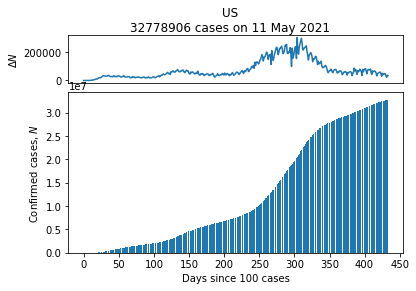

In [120]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# set plot when Minimum confiremed casese Begin with 100 
MIN_CASES = 100

# plot data for Covid-19 confirmed cases for United States
country = 'US'

# GitHub URL for the Johns Hopkins data in CSV format
data_loc = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/'
           'csse_covid_19_data/csse_covid_19_time_series'
           '/time_series_covid19_confirmed_global.csv')

# Read in the data to a pandas DataFrame.
if not READ_FROM_URL:
    data_loc = LOCAL_CSV_FILE
df = pd.read_csv(data_loc)

# Group by country and sum over the different states/regions of each country.
grouped = df.groupby('Country/Region')
df2 = grouped.sum()

def plot(country):
    
    # Extract the Series corresponding to the case numbers for country.
    c_df = df2.loc[country, df2.columns[3:]]
    # Discard any columns with fewer than MIN_CASES.
    c_df = c_df[c_df >= MIN_CASES].astype(int)
    # Convet index to a proper datetime object
    c_df.index = pd.to_datetime(c_df.index)
    n = len(c_df)
    if n == 0:
        print('Too few data to plot: minimum number of cases is {}'
                .format(MIN_CASES))
        sys.exit(1)

    fig = plt.Figure()

    # Arrange the subplots on a grid: the top plot (case number change) is
    # one quarter the height of the bar chart (total confirmed case numbers).
    ax2 = plt.subplot2grid((4,1), (0,0))
    ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    ax1.bar(range(n), c_df.values)
    # Force the x-axis to be in integers (whole number of days) in case
    # Matplotlib chooses some non-integral number of days to label).
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    c_df_change = c_df.diff()
    ax2.plot(range(n), c_df_change.values)
    ax2.set_xticks([])

    ax1.set_xlabel('Days since {} cases'.format(MIN_CASES))
    ax1.set_ylabel('Confirmed cases, $N$')
    ax2.set_ylabel('$\Delta N$')

    # Add a title reporting the latest number of cases available.
    title = '{}\n{} cases on {}'.format(country, c_df[-1],
                c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)

make_plot(country)
plt.show()

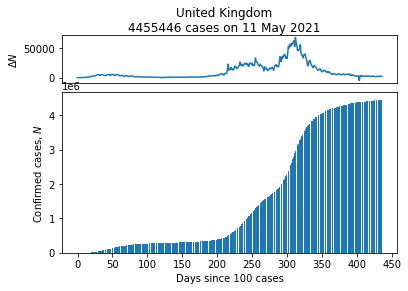

In [81]:
# plot data for Covid-19 confirmed cases for United Kingdom
country = 'United Kingdom'

make_plot(country)

plt.show()

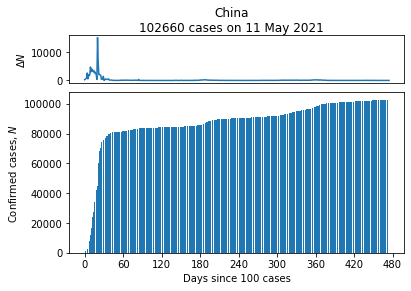

In [82]:
# plot data for Covid-19 confirmed cases for China
country = 'China'

make_plot(country)

plt.show()

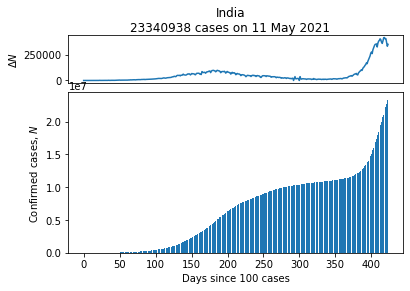

In [83]:
# plot data for Covid-19 confirmed cases for India
country = 'India'

make_plot(country)

plt.show()

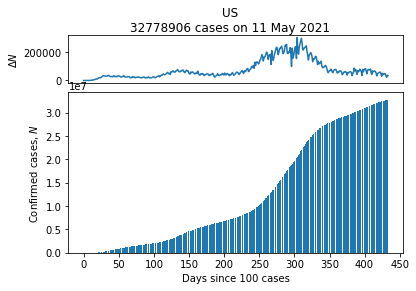

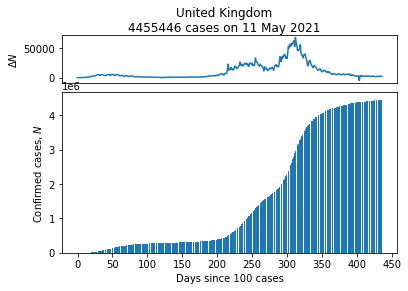

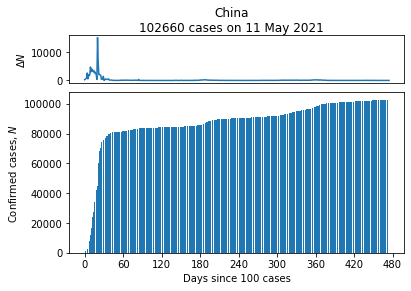

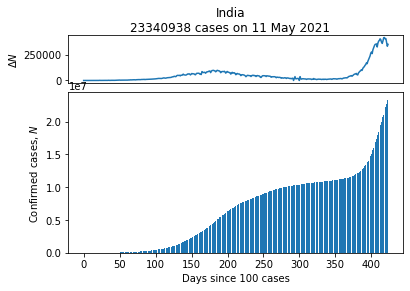

In [84]:
# plot data for Covid-19 confirmed cases for United Kingdom
country = 'US'

make_plot(country)

plt.show()

# plot data for Covid-19 confirmed cases for United Kingdom
country = 'United Kingdom'

make_plot(country)

plt.show()

# plot data for Covid-19 confirmed cases for United Kingdom
country = 'China'

make_plot(country)

plt.show()

# plot data for Covid-19 confirmed cases for United Kingdom
country = 'India'

make_plot(country)

plt.show()

In [166]:
# pip install Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import  plot_plotly,add_changepoints_to_plot

dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0]
k = df1[df1['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_confirmed = k.values.tolist()[0]

# for India
data_india= pd.DataFrame(columns=['ds','y'])
data_india['ds'] = dates_india
data_india['y'] = india_confirmed

# for Iran
data_iran= pd.DataFrame(columns=['ds','y'])
data_iran['ds'] = dates_india
data_iran['y'] = iran_confirmed

In [155]:
# Forcasting Comfirmed Cases for next 10 days for India

prop = Prophet(interval_width=0.97)
prop.fit(data_india)
future_india = prop.make_future_dataframe(periods=10)
future_india.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
468,2021-05-12
469,2021-05-13
470,2021-05-14
471,2021-05-15
472,2021-05-16
473,2021-05-17
474,2021-05-18
475,2021-05-19
476,2021-05-20
477,2021-05-21


In [163]:
forecast = prop.predict(future_india)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
473,2021-05-17,1.841174e+07,1.635323e+07,2.013252e+07
474,2021-05-18,1.850679e+07,1.658590e+07,2.053711e+07
475,2021-05-19,1.852002e+07,1.657833e+07,2.035822e+07
476,2021-05-20,1.861837e+07,1.675053e+07,2.055760e+07
477,2021-05-21,1.871495e+07,1.680766e+07,2.072014e+07


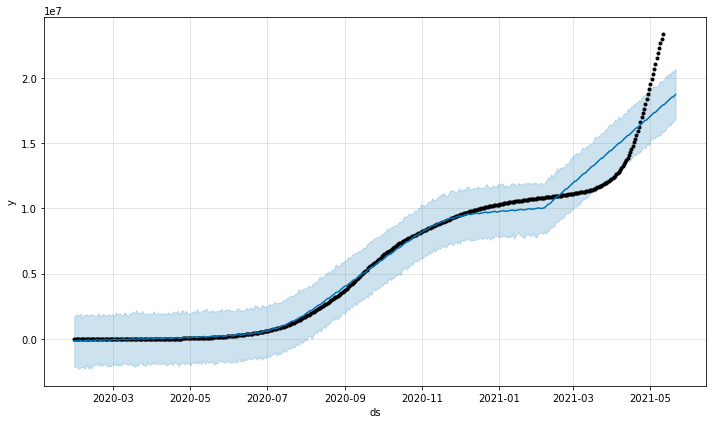

In [164]:
confirmed_forecast_indiaPlot = prop.plot(forecast)

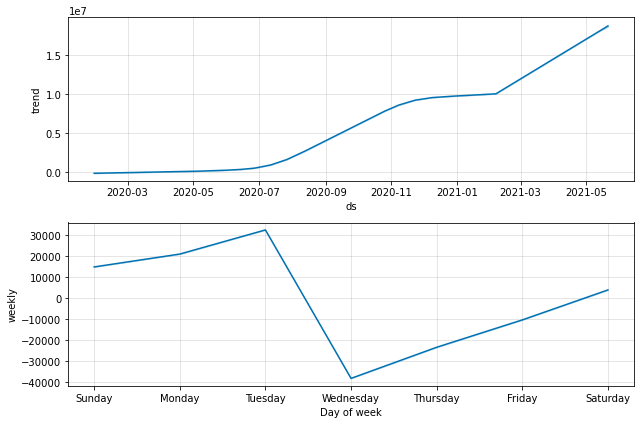

In [165]:
confirmed_forecast_indiaPlot =prop.plot_components(forecast)